In [53]:
import pandas as pd
import numpy as np

In [54]:
sample = pd.read_csv('sample.csv', low_memory = False)

In [55]:
sample

,Unnamed: 0,outlook,temp,humidity,windy,play
0,0,overcast,hot,high,False,yes
1,1,overcast,cool,normal,True,yes
2,2,overcast,mild,high,True,yes
3,3,overcast,hot,normal,False,yes
4,4,rainy,mild,high,False,yes
5,5,rainy,cool,normal,False,yes
6,6,rainy,cool,normal,True,no
7,7,rainy,mild,normal,False,yes
8,8,rainy,mild,high,True,no
9,9,sunny,hot,high,False,no


In [56]:
sample = sample.iloc[:, 1:]

In [57]:
sample

,outlook,temp,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [58]:
len(sample.loc[sample.play == 'yes', :]) / len(sample)

0.6428571428571429

In [59]:
len(sample.loc[sample.play == 'no', :]) / len(sample)

0.35714285714285715

In [60]:
pk_yes = np.sum(sample.play == 'yes') / len(sample)
pk_no = np.sum(sample.play == 'no') / len(sample)

In [61]:
-(pk_yes*np.log2(pk_yes) + pk_no*np.log2(pk_no))

0.9402859586706311

In [62]:
overcast = sample.loc[sample.outlook == 'overcast', :]

In [63]:
def entropy(x):
    px = np.unique(x, return_counts=True)[1]/len(x)
    entropy_ = -np.sum(px*np.log2(px))
    return entropy_

In [64]:
entropy(sample.play)

0.9402859586706311

In [65]:
entropy([1, 1, 1, 2, 2, 2, 2, 2])

0.954434002924965

In [66]:

#y = play
total = entropy(sample.play)
#x = sample 독립변수

In [67]:
vals, counts = np.unique(sample.outlook,return_counts=True)

In [68]:
a1 = counts[0]/len(sample)*entropy(sample.loc[sample.outlook == vals[0], 'play'])

In [69]:
a2 = counts[1]/len(sample)*entropy(sample.loc[sample.outlook == vals[1], 'play'])

In [70]:
a3 = counts[2]/len(sample)*entropy(sample.loc[sample.outlook == vals[2], 'play'])

In [71]:
a1 + a2 + a3

0.6935361388961918

In [72]:
total

0.9402859586706311

In [73]:
total - (a1 + a2 + a3)

0.24674981977443933

In [74]:
def info_gain(data, x, y):
    total = entropy(data[y])
    vals, counts = np.unique(data[x], return_counts=True)
    gain = [ count/len(data)*entropy(data.loc[data[x] == val, y]) for val, count in zip(vals, counts) ]
    return total - np.sum(gain)

In [75]:
info_gain(sample, 'outlook', 'play')

0.24674981977443933

In [76]:
def get_info(data, x, y):
    total = entropy(data[y])
    vals, counts = np.unique(data[x], return_counts=True)
    gain = [for val, count in zip(vals, counts)]
    

SyntaxError: invalid syntax (3621164922.py, line 4)

In [77]:
# data = sample
# 종속변수(y) = play
# 선택변수(x) = temp
# np.unique(sample.temp)

x1 = sample.loc[sample['temp'] == np.unique(sample.temp)[0],'play']
count_x1 = len(x1)
x2 = sample.loc[sample['temp'] == np.unique(sample.temp)[1],'play']
count_x2 = len(x2)
x3 = sample.loc[sample['temp'] == np.unique(sample.temp)[2],'play']
count_x3 = len(x3)

px1 = count_x1/len(sample)
px2 = count_x2/len(sample)
px3 = count_x3/len(sample)


entropy(x1), entropy(x2), entropy(x3), count_x1, count_x2, count_x3

gain = [entropy(x1)*px1, entropy(x2)*px2, entropy(x3)*px3]
np.sum(gain)

0.9110633930116763

In [78]:
gain = []
for val in np.unique(sample.temp):
    x = sample.loc[sample['temp'] == val, 'play']
    count_x = len(x)
    px = count_x/len(sample)
    gain.append(px*entropy(x))
np.sum(gain)

0.9110633930116763

In [79]:
def get_gain(data,x,y):
    total_info = entropy(data[y])
    gain = []
    for val in np.unique(data[x]):
        info = data.loc[data[x] == val,y]
        count = len(info)
        px = count/len(data)
        gain.append(px*entropy(info))
    return total_info - np.sum(gain)

In [80]:
get_gain(sample, 'temp', 'play')

0.02922256565895487

In [81]:
aa = []
features = sample.columns[:-1]
for i in features:
    aa.append(get_gain(sample, i, 'play'))
features[np.argmax(aa)]

'outlook'

In [82]:
def max_gain(data, x, y):
    return x[np.argmax([get_gain(data, i, y) for i in x])]

In [83]:
data = sample
x = sample.columns[:-1]
y = sample.columns[-1]
best_feature = max_gain(data,x,y)

In [84]:
best_feature

'outlook'

In [85]:
tree = {best_feature:{}}

In [86]:
tree

{'outlook': {}}

In [87]:
def make_tree(data,x,y):
    best_feature = max_gain(data,x,y)
    tree = {best_feature:{}}
    return tree

In [88]:
make_tree(data, x, y)

{'outlook': {}}

In [89]:
def make_tree(data,x,y):
    best_feature = max_gain(data,x,y)
    columns = x[ x != best_feature]
    tree = {best_feature:{}}
    count = []
    for val in np.unique(data[best_feature]): # overcast, sunny, rainy
        sub_data = data.loc[data[best_feature] == val,:]
        count.append((val,len(sub_data)))
    return count

In [90]:
make_tree(data, x, y)

[('overcast', 4), ('rainy', 5), ('sunny', 5)]

In [91]:
def make_tree(data, x, y):
    best_feature = max_gain(data, x, y)
    columns = x[ x != best_feature ]
    tree = {best_feature:{}}
    for val in np.unique(data[best_feature]): #overcast, sunny, rainy
        sub_data = data.loc[data[best_feature] == val, :]
        sub_tree = make_tree(sub_data, columns, y)
        tree[best_feature][val] = sub_tree
    return tree

In [92]:
data.loc[data[best_feature] == val, :]

,outlook,temp,humidity,windy,play


In [93]:
def make_tree(data,x,y,parent_class=None):
    try:
        if np.unique(data[y]).size == 1:
            return np.unique(data[y])[0]
        elif len(data) == 0:
            return 'case_1'
        elif len(x) == 0:
            return parent_class
        best_feature = max_gain(data,x,y)
        columns = x[ x != best_feature]
        tree = {best_feature:{}}
        for val in np.unique(data[best_feature]):
            vals, counts = np.unique(data.loc[data[best_feature] == val,y],return_counts=True)
            parent_class = vals[np.argmax(counts)]
            sub_data = data.loc[data[best_feature] == val,:]
            sub_tree = make_tree(sub_data,columns,y,parent_class)
            tree[best_feature][val] = sub_tree
        return tree
    except Exception as e:
        print(e)

In [94]:
make_tree(data, x, y)

{'outlook': {'overcast': 'yes',
  'rainy': {'windy': {False: 'yes', True: 'no'}},
  'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}

In [95]:
for val in np.unique(data[best_feature]):
    print(val)
vals = [val for val in np.unique(data[best_feature])]

overcast
rainy
sunny


In [96]:
data.loc[data[best_feature] == vals[0], :]

,outlook,temp,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes


In [97]:
tree['outlook'] = {'overcast'}

In [98]:
tree

{'outlook': {'overcast'}}

In [99]:
data.windy.dtype

dtype('bool')

In [100]:
data

,outlook,temp,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [101]:
x = data.columns[:-1]
y = data.columns[-1:]

In [102]:
import pprint

In [103]:
test_data = np.array(['overcast','cool','high','False'])

In [104]:
tree2['outlook'][test_data[0]]['temp'][test_data[1]]

NameError: name 'tree2' is not defined

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [106]:
model = DecisionTreeClassifier()

In [107]:
le_outlook = LabelEncoder().fit(data.outlook)
le_temp = LabelEncoder().fit(data.temp)
le_humidity = LabelEncoder().fit(data.humidity)
le_windy = LabelEncoder().fit(data.windy)

In [108]:
X = np.c_[le_outlook.transform(data.outlook),
     le_temp.transform(data.temp),
     le_humidity.transform(data.humidity),
     le_windy.transform(data.windy)]
y = data.play

In [109]:
model.fit(X, y)

DecisionTreeClassifier()

In [110]:
test_data = np.array(['overcast','cool','high','False'])

In [111]:
le_outlook.transform(['overcast']), le_temp.transform(['cool']), le_humidity.transform(['high']), le_windy.transform(['False'])

(array([0]), array([0]), array([0]), array([1], dtype=int64))

In [112]:
X.shape

(14, 4)

In [113]:
model.predict(np.array([0, 0, 0, 0]).reshape(1, 4))

array(['yes'], dtype=object)

In [114]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [115]:
from sklearn import tree

In [116]:
from sklearn.tree import plot_tree

In [117]:
tree_model = DecisionTreeClassifier(max_depth=3)

In [118]:
tree_model.fit(X, y)

DecisionTreeClassifier(max_depth=3)

[Text(0.375, 0.875, 'x[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.375, 'x[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.125, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.375, 'x[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]')]

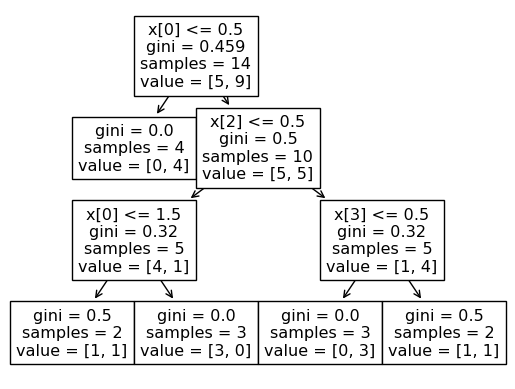

In [119]:
plot_tree(tree_model)

In [120]:
tree_model.predict(np.array([0, 0, 0, 0]).reshape(1, 4))

array(['yes'], dtype=object)

In [121]:
from sklearn.naive_bayes import GaussianNB

In [122]:
model = GaussianNB() 

In [123]:
model

GaussianNB()

In [124]:
model.fit(X, y)

GaussianNB()

In [125]:
model.predict(X)

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'yes', 'yes'], dtype='<U3')

In [126]:
from sklearn import naive_bayes

In [127]:
dir(naive_bayes)

['ABCMeta',
 'BaseEstimator',
 'BernoulliNB',
 'CategoricalNB',
 'ClassifierMixin',
 'ComplementNB',
 'GaussianNB',
 'Hidden',
 'Integral',
 'Interval',
 'LabelBinarizer',
 'MultinomialNB',
 'Real',
 'StrOptions',
 '_BaseDiscreteNB',
 '_BaseNB',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_check_partial_fit_first_call',
 '_check_sample_weight',
 '_fit_context',
 'abstractmethod',
 'binarize',
 'check_is_fitted',
 'check_non_negative',
 'label_binarize',
 'logsumexp',
 'np',
 'safe_sparse_dot',
 'warnings']

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [129]:
X_train, X_test, y_train, y_test = train_test_split(load_digits()['data'], load_digits()['target'])

In [130]:
tree_model = DecisionTreeClassifier()
lr_model = LogisticRegression()
bayes_model = GaussianNB()
svm_model = SVC()

In [131]:
tree_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
bayes_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [132]:
print(f' 의사결정트리 accuracy : {tree_model.score(X_test, y_test)}')
print(f' 로지스틱회귀 accuracy : {lr_model.score(X_test, y_test)}')
print(f' 나이브베이지안 accuracy : {bayes_model.score(X_test, y_test)}')
print(f' 서포트벡터 머신 accuracy : {svm_model.score(X_test, y_test)}')

 의사결정트리 accuracy : 0.8488888888888889
 로지스틱회귀 accuracy : 0.9755555555555555
 나이브베이지안 accuracy : 0.8844444444444445
 서포트벡터 머신 accuracy : 0.9911111111111112


In [133]:
svm_model = SVC(kernel='sigmoid')

In [134]:
svm_model.fit(X_train, y_train)
svm_model.score(X_test, y_test)

0.9022222222222223

In [135]:
print(f' 의사결정트리 예측값 : {tree_model.predict(new_data)}')
print(f' 로지스틱회귀 예측값 : {lr_model.predict(new_data)}')
print(f' 나이브베이지안 예측값 : {bayes_model.predict(new_data)}')
print(f' 서포트벡터 머신 예측값 : {svm_model.predict(new_data)}')

NameError: name 'new_data' is not defined

In [136]:
from sklearn.datasets import load_iris

In [137]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(load_iris()['data'])
X = pca.transform(load_iris()['data'])

In [138]:
import numpy as np

In [139]:
x_axis_min, x_axis_max = np.min(X[:, 0]), np.max(X[:, 0])
y_axis_min, y_axis_max = np.min(X[:, 1]), np.max(X[:, 1])

In [140]:
import matplotlib.pyplot as plt

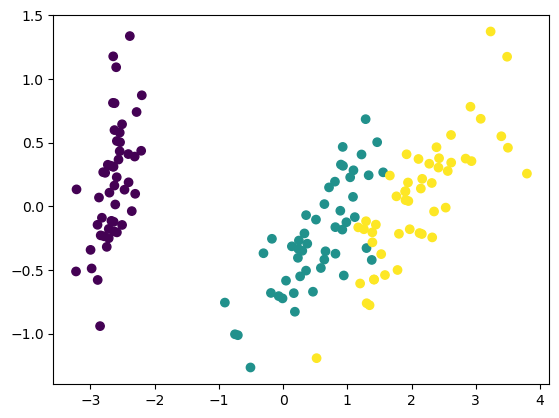

In [141]:
plt.scatter(X[:, 0], X[:, 1], c=load_iris()['target'])
plt.show()

In [142]:
linear_kernel = SVC(kernel = 'linear')

In [143]:
linear_kernel.fit(X, load_iris()['target'])

SVC(kernel='linear')

In [144]:
x1 = np.linspace(x_axis_min - 1, x_axis_max + 1, 500)
x2 = np.linspace(y_axis_min - 1, y_axis_max + 1, 500)

In [145]:
linear_predict = linear_kernel.predict(np.c_[x1, x2])

In [146]:
linear_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

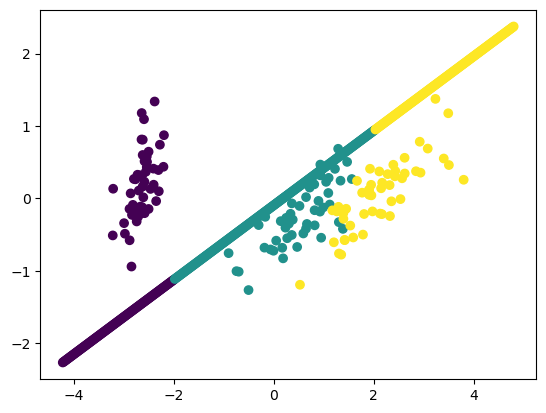

In [147]:
plt.scatter(x1, x2, c=linear_predict)
plt.scatter(X[:, 0], X[:,1], c=load_iris()['target'])
plt.show()

In [148]:
y1, y2 = np.meshgrid(x1, x2)
np.c_[y1[0, :], y2[0, :]]

array([[-4.22380374, -2.26597119],
       [-4.2057287 , -2.26597119],
       [-4.18765365, -2.26597119],
       [-4.1695786 , -2.26597119],
       [-4.15150355, -2.26597119],
       [-4.1334285 , -2.26597119],
       [-4.11535345, -2.26597119],
       [-4.0972784 , -2.26597119],
       [-4.07920336, -2.26597119],
       [-4.06112831, -2.26597119],
       [-4.04305326, -2.26597119],
       [-4.02497821, -2.26597119],
       [-4.00690316, -2.26597119],
       [-3.98882811, -2.26597119],
       [-3.97075307, -2.26597119],
       [-3.95267802, -2.26597119],
       [-3.93460297, -2.26597119],
       [-3.91652792, -2.26597119],
       [-3.89845287, -2.26597119],
       [-3.88037782, -2.26597119],
       [-3.86230278, -2.26597119],
       [-3.84422773, -2.26597119],
       [-3.82615268, -2.26597119],
       [-3.80807763, -2.26597119],
       [-3.79000258, -2.26597119],
       [-3.77192753, -2.26597119],
       [-3.75385248, -2.26597119],
       [-3.73577744, -2.26597119],
       [-3.71770239,

In [149]:
predict = np.zeros((500*500, 3))
for i in range(500):
    pr = linear_kernel.predict(np.c_[y1[i, :], y2[i, :]])
    result = np.c_[y1[i, :], y2[i, :], pr]
    predict[i*500:(i+1)*500, :] = result
    

In [150]:
predict.shape

(250000, 3)

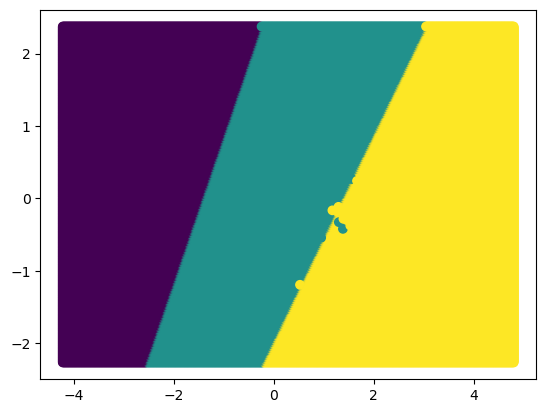

In [151]:
plt.scatter(predict[:, 0], predict[:, 1], c=predict[:, 2])
plt.scatter(X[:, 0], X[:,1], c=load_iris()['target'])
plt.show()

In [152]:
sigmoid_model = SVC(kernel = 'sigmoid')
rbf_model = SVC(kernel = 'rbf')

In [153]:
sigmoid_model.fit(X, load_iris()['target'])
rbf_model.fit(X, load_iris()['target'])

SVC()

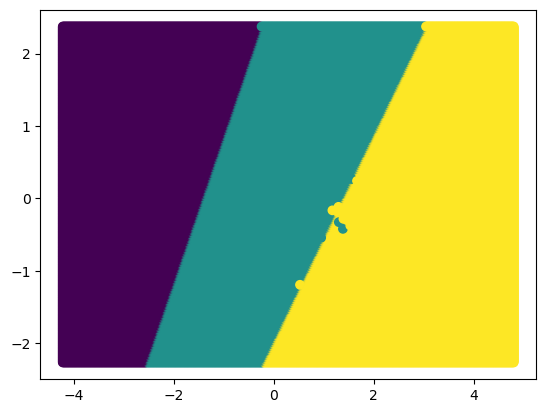

In [154]:
plt.scatter(predict[:, 0], predict[:, 1], c=predict[:, 2])
plt.scatter(X[:, 0], X[:,1], c=load_iris()['target'])
plt.show()

In [155]:
def svm_graph(X, y, model, grid=100):
    x1, x2 = X[:, 0], X[:, 1]
    model = model
    x_axis_min, x_axis_max = np.min(x1) - 2*np.std(x1),  np.max(x1) + 2*np.std(x1)
    y_axis_min, y_axis_max = np.min(x2) - 2*np.std(x2),  np.max(x2) + 2*np.std(x2)
    x_axis = np.linspace(x_axis_min, x_axis_max, grid)
    y_axis = np.linspace(y_axis_min, y_axis_max, grid)
    new_x1, new_x2 = np.meshgrid(x_axis, y_axis)
    predict = np.zeros((grid*grid, 3))
    for i in range(grid):
        pr = model.predict(np.c_[new_x1[i, :], new_x2[i, :]])
        result = np.c_[new_x1[i, :], new_x2[i, :], pr]
        predict[i*grid:(i+1)*grid, :] = result
    x_ = predict[:, 0]
    y_ = predict[:, 1]
    c_ = predict[:,2]
    plt.scatter(x_, y_, c=c_)
    plt.scatter(x1, x2, c=y, cmap='magma')
    plt.show()
        

In [156]:
def svm_graph_no_for(X, y, model, grid=100):
    x1, x2 = X[:, 0], X[:, 1]
    model = model
    x_axis_min, x_axis_max = np.min(x1) - 2*np.std(x1),  np.max(x1) + 2*np.std(x1)
    y_axis_min, y_axis_max = np.min(x2) - 2*np.std(x2),  np.max(x2) + 2*np.std(x2)
    x_axis = np.linspace(x_axis_min, x_axis_max, grid)
    y_axis = np.linspace(y_axis_min, y_axis_max, grid)
    new_x1, new_x2 = np.meshgrid(x_axis, y_axis)
    new_x = np.c_[new_x1.flatten(),new_x2.flatten()]
    pr = model.predict(new_x)
    plt.scatter(new_x[:, 0], new_x[:, 1], c=pr)
    plt.scatter(x1, x2, c=y, cmap='magma')
    plt.show()
        

In [157]:
y = load_iris()['target']

In [158]:
svm_model = SVC(kernel = 'sigmoid')
svm_model.fit(X, y)

SVC(kernel='sigmoid')

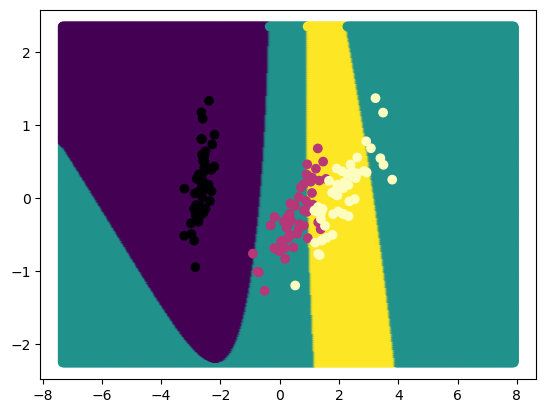

In [159]:
svm_graph(X, y, svm_model, 500)

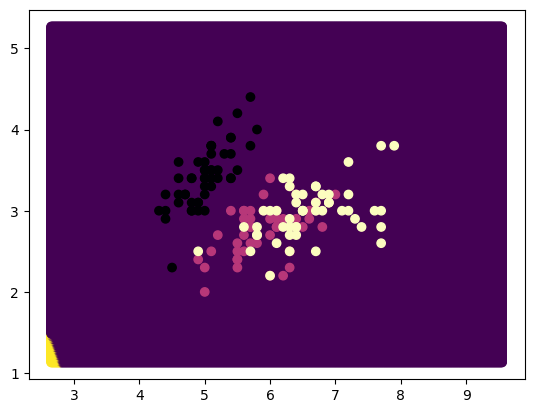

In [160]:
svm_graph_no_for(load_iris()['data'][:, :2], load_iris()['target'], svm_model, 500)

In [161]:
from sklearn.datasets import load_wine

In [162]:
print(load_wine()['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [164]:
model1 = KNeighborsClassifier()
model2 = DecisionTreeClassifier()
model3 = SVC()
model4 = LogisticRegression()
model5 = GaussianNB()

In [165]:
X = load_wine()['data']
y = load_wine()['target']

In [166]:
X_train, X_test,y_train, y_test = train_test_split(X, y)

In [167]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [168]:
np.c_[model1.predict(X_test),
model2.predict(X_test),
model3.predict(X_test),
model4.predict(X_test),
model5.predict(X_test)]

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [2, 2, 1, 2, 2],
       [1, 2, 1, 2, 2],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 2, 1, 1],
       [1, 2, 1, 2, 2],
       [2, 2, 2, 2, 2],
       [0, 2, 0, 0, 0],
       [2, 0, 2, 0, 1],
       [1, 2, 2, 2, 2],
       [0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 2, 2, 2, 2],
       [0, 0, 0, 0, 0],
       [1, 2, 1, 2, 1],
       [2, 1, 2, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [1, 2, 1, 2, 2],
       [0, 0, 0, 0, 0],
       [2, 1, 0, 1, 0],
       [0, 0, 2, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 1, 2, 2],
       [1, 1, 1, 1, 1],
       [0, 2, 2, 2, 2],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [2, 1, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [0, 0, 0,

In [169]:
np.unique(np.c_[model1.predict(X_test),
model2.predict(X_test),
model3.predict(X_test),
model4.predict(X_test),
model5.predict(X_test)], return_counts=True, axis=0)

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 1],
        [0, 0, 2, 0, 0],
        [0, 2, 0, 0, 0],
        [0, 2, 2, 2, 2],
        [1, 1, 1, 1, 1],
        [1, 1, 2, 1, 1],
        [1, 2, 1, 2, 1],
        [1, 2, 1, 2, 2],
        [1, 2, 2, 2, 2],
        [2, 0, 2, 0, 1],
        [2, 1, 0, 1, 0],
        [2, 1, 1, 1, 1],
        [2, 1, 2, 1, 1],
        [2, 1, 2, 2, 2],
        [2, 2, 1, 2, 2],
        [2, 2, 2, 2, 2]]),
 array([10,  1,  1,  1,  1,  1,  2, 12,  1,  1,  3,  2,  1,  1,  1,  1,  1,
         2,  2], dtype=int64))

In [170]:
import pandas as pd

In [171]:
result = pd.DataFrame(np.c_[model1.predict(X_test),
model2.predict(X_test),
model3.predict(X_test),
model4.predict(X_test),
model5.predict(X_test)])

In [172]:
x

Index(['outlook', 'temp', 'humidity', 'windy'], dtype='object')

In [173]:
from collections import Counter

In [174]:
cnt = Counter(x)

In [175]:
cnt.most_common()[0][0]

'outlook'

In [176]:
def get_result(x):
    cnt = Counter(x)
    return cnt.most_common()[0][0]


In [177]:
result.iloc[1,:]

0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int32

In [178]:
get_result(result.iloc[1,:])


1

In [179]:
from sklearn.metrics import accuracy_score
accuracy_score(result.apply(get_result, 1), y_test)

0.8666666666666667

In [180]:
def vote_clf(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model1 = KNeighborsClassifier().fit(X_train, y_train)
    model2 = DecisionTreeClassifier().fit(X_train, y_train)
    model3 = SVC().fit(X_train, y_train)
    model4 = LogisticRegression().fit(X_train, y_train)
    model5 = GaussianNB().fit(X_train, y_train)
    pr1 = model1.predict(X_test)
    pr2 = model2.predict(X_test)
    pr3 = model3.predict(X_test)
    pr4 = model4.predict(X_test)
    pr5 = model5.predict(X_test)
    pr1_acc = accuracy_score(pr1, y_test)
    pr2_acc = accuracy_score(pr2, y_test)
    pr3_acc = accuracy_score(pr3, y_test)
    pr4_acc = accuracy_score(pr4, y_test)
    pr5_acc = accuracy_score(pr5, y_test)
    vote_acc = accuracy_score(pd.DataFrame(np.c_[pr1, pr2, pr3, pr4, pr5]).apply(get_result, 1), y_test)
    print(f'최근접 이웃 정확도 : {pr1_acc}')
    print(f'결정트리 정확도 : {pr2_acc}')
    print(f'지지벡터머신 정확도 : {pr3_acc}')
    print(f'로지스틱회귀 정확도 : {pr4_acc}')
    print(f'나이브베이지안 정확도 : {pr5_acc}')
    print(f'앙상블(하드보팅) 정확도 : {vote_acc}')

In [181]:
def vote_clf1(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model1 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
    model2 = DecisionTreeClassifier().fit(X_train, y_train)
    model3 = SVC(probability=True).fit(X_train, y_train)
    model4 = LogisticRegression().fit(X_train, y_train)
    model5 = GaussianNB().fit(X_train, y_train)
    pr1 = model1.predict_proba(X_test)
    pr2 = model2.predict_proba(X_test)
    pr3 = model3.predict_proba(X_test)
    pr4 = model4.predict_proba(X_test)
    pr5 = model5.predict_proba(X_test)
    pr1_acc = accuracy_score(np.argmax(pr1, 1), y_test)
    pr2_acc = accuracy_score(np.argmax(pr2, 1), y_test)
    pr3_acc = accuracy_score(np.argmax(pr3, 1), y_test)
    pr4_acc = accuracy_score(np.argmax(pr4, 1), y_test)
    pr5_acc = accuracy_score(np.argmax(pr5, 1), y_test)
    vote_acc = accuracy_score(np.argmax((pr1+pr2+pr3+pr4+pr5), 1), y_test)
    print(f'최근접 이웃 정확도 : {pr1_acc}')
    print(f'결정트리 정확도 : {pr2_acc}')
    print(f'지지벡터머신 정확도 : {pr3_acc}')
    print(f'로지스틱회귀 정확도 : {pr4_acc}')
    print(f'나이브베이지안 정확도 : {pr5_acc}')
    print(f'앙상블(소프트보팅) 정확도 : {vote_acc}')

In [182]:
X = load_wine()['data']
y = load_wine()['target']
vote_clf(X, y)

최근접 이웃 정확도 : 0.7111111111111111
결정트리 정확도 : 0.9111111111111111
지지벡터머신 정확도 : 0.7333333333333333
로지스틱회귀 정확도 : 0.9555555555555556
나이브베이지안 정확도 : 0.9777777777777777
앙상블(하드보팅) 정확도 : 0.8888888888888888


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [183]:
vote_clf1(X,y)

최근접 이웃 정확도 : 0.5777777777777777
결정트리 정확도 : 1.0
지지벡터머신 정확도 : 0.6444444444444445
로지스틱회귀 정확도 : 0.9333333333333333
나이브베이지안 정확도 : 0.9777777777777777
앙상블(소프트보팅) 정확도 : 0.9777777777777777


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = GaussianNB().fit(X_train, y_train)

In [185]:
model.predict(X_test)

array([2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2,
       0, 2, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1,
       1])

In [186]:
model.predict_proba(X_test)

array([[2.74832493e-20, 2.98674134e-02, 9.70132587e-01],
       [1.00000000e+00, 3.83451160e-12, 5.21285636e-32],
       [9.99999683e-01, 3.17407479e-07, 1.16331868e-30],
       [1.00000000e+00, 1.08349969e-11, 4.79997220e-37],
       [2.57389618e-18, 9.99999908e-01, 9.23546589e-08],
       [2.33568319e-01, 7.66431681e-01, 5.94059136e-15],
       [4.23397435e-30, 4.45281318e-09, 9.99999996e-01],
       [2.60868278e-11, 1.00000000e+00, 1.83041815e-17],
       [5.03808699e-14, 1.00000000e+00, 2.22344877e-17],
       [4.17512960e-15, 9.99989080e-01, 1.09200730e-05],
       [9.99903074e-01, 9.69257848e-05, 8.50415022e-33],
       [1.96609501e-07, 9.99999803e-01, 8.21484166e-25],
       [7.19554834e-19, 9.99999974e-01, 2.63414243e-08],
       [9.99969855e-01, 3.01450699e-05, 1.06340793e-31],
       [9.99999985e-01, 1.50687621e-08, 1.33030550e-43],
       [9.99999665e-01, 3.35468057e-07, 6.50235788e-35],
       [9.91971513e-01, 8.02848722e-03, 5.30265347e-28],
       [2.09837112e-08, 9.99999

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [188]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_model.score(X_test,y_test)

0.9777777777777777

In [189]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

0.6

In [190]:
meta_model = RandomForestClassifier()
pd.DataFrame(np.c_[model1.predict(X), model2.predict(X), model3.predict(X), model4.predict(X), model5.predict(X), y])


,0,1,2,3,4,5
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,2,0,2,1,0,0
...,...,...,...,...,...,...
173,2,2,2,2,2,2
174,2,2,2,2,2,2
175,0,2,2,2,2,2
176,0,2,2,2,2,2


In [191]:
def stacking(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model1 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
    model2 = DecisionTreeClassifier().fit(X_train, y_train)
    model3 = SVC(probability=True).fit(X_train, y_train)
    model4 = LogisticRegression().fit(X_train, y_train)
    model5 = GaussianNB().fit(X_train, y_train)
    
    pr1 = model1.predict(X_train)
    pr2 = model2.predict(X_train)
    pr3 = model3.predict(X_train)
    pr4 = model4.predict(X_train)
    pr5 = model5.predict(X_train)
    
    new_x = np.c_[pr1, pr2, pr3, pr4, pr5]
    meta_model = RandomForestClassifier()
    meta_model.fit(new_x, y_train)
    
    pr1_acc = accuracy_score(model1.predict(X_test), y_test)
    pr2_acc = accuracy_score(model2.predict(X_test), y_test)
    pr3_acc = accuracy_score(model3.predict(X_test), y_test)
    pr4_acc = accuracy_score(model4.predict(X_test), y_test)
    pr5_acc = accuracy_score(model5.predict(X_test), y_test)
    meta_test = np.c_[model1.predict(X_test), 
                     model2.predict(X_test), 
                     model3.predict(X_test), 
                     model4.predict(X_test), 
                     model5.predict(X_test)]
    meta_pr = meta_model.predict(meta_test)
    meta_acc = accuracy_score(meta_pr, y_test)
    print(f'최근접 이웃 정확도 : {pr1_acc}')
    print(f'결정트리 정확도 : {pr2_acc}')
    print(f'지지벡터머신 정확도 : {pr3_acc}')
    print(f'로지스틱회귀 정확도 : {pr4_acc}')
    print(f'나이브베이지안 정확도 : {pr5_acc}')
    print(f'앙상블(스태킹) 정확도 : {meta_acc}')

In [192]:
stacking(X, y)

최근접 이웃 정확도 : 0.7555555555555555
결정트리 정확도 : 0.8888888888888888
지지벡터머신 정확도 : 0.7777777777777778
로지스틱회귀 정확도 : 0.9333333333333333
나이브베이지안 정확도 : 1.0
앙상블(스태킹) 정확도 : 0.9111111111111111


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [193]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
rf = RandomForestClassifier()

In [195]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [196]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [197]:
X = load_iris()['data']
y = load_iris()['target']

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [199]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [200]:
dir(rf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score_and_attributes',
 '_validate_X_predict',
 '_validate_data',
 '_validate

In [201]:
rf.feature_importances_

array([0.07771737, 0.02929176, 0.45772583, 0.43526503])

In [202]:
import pandas as pd

In [203]:
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [204]:
rf1 = RandomForestClassifier()
rf1.fit(X_train[:, 0:2], y_train)
rf1.score(X_test[:, 0:2], y_test)

0.8666666666666667

In [205]:
rf2 = RandomForestClassifier()
rf2.fit(X_train[:,2:4], y_train)
rf2.score(X_test[:, 2:4], y_test)

0.9666666666666667

In [206]:
a = np.array([5., 7.2, 0.7, 0.3]).reshape(1, 4)

In [207]:
from scipy.spatial import distance

In [208]:
X_train.shape

(120, 4)

In [209]:
(X_train - a)

array([[ 1.7, -4.1,  4. ,  1.2],
       [ 0.2, -3.8,  0.7, -0.1],
       [ 0.2, -4.5,  3.2,  1.1],
       [ 0.4, -3.3,  0.6,  0.1],
       [ 0.5, -3. ,  0.7, -0.1],
       [ 1.5, -4.2,  4.5,  1.7],
       [-0.1, -4.2,  0.7, -0.1],
       [ 1.8, -4.2,  4.8,  1.8],
       [-0.2, -3.8,  0.9, -0.1],
       [ 0. , -3.8,  0.8, -0.1],
       [ 0.7, -4.3,  3.5,  1. ],
       [ 0.6, -4.5,  3.5,  1. ],
       [ 0.2, -3.1,  0.8, -0.2],
       [ 1.4, -4.3,  3.6,  1. ],
       [ 1. , -3.8,  3.8,  1.3],
       [ 1.3, -3.9,  4. ,  1.3],
       [ 1.5, -4.4,  3.9,  1.2],
       [ 0. , -5.2,  2.8,  0.7],
       [ 0.5, -4.6,  3.7,  0.9],
       [-0.2, -4.2,  0.7,  0. ],
       [ 0.8, -4.6,  3.3,  0.9],
       [ 0. , -4. ,  0.5, -0.1],
       [ 0.1, -3.7,  0.7, -0.1],
       [ 2.4, -4.4,  5.4,  1.6],
       [-0.5, -4.9,  0.6,  0. ],
       [ 1.1, -4.2,  3.9,  1.1],
       [ 0. , -3.9,  0.7, -0.1],
       [ 1.1, -4.3,  4. ,  1.1],
       [ 0.8, -4.5,  3.2,  0.9],
       [ 0.6, -4.4,  4.2,  1.7],
       [ 0

In [210]:
y_train[np.argsort(np.sum(np.square(X_train - a), 1))[:30]]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [211]:
def knn(X, y, data, k=5):
    dist = np.sum(np.square(X-data), 1) # data로부터 각 X값의 거리
    close_dist = np.argsort(dist)[:k]
    class_, cnt = np.unique(y[close_dist], return_counts=True)
    return class_[np.argsort(cnt)], close_dist
    

In [212]:
x = np.abs(np.random.randn(1, 4))*5

In [213]:
knn(X_train, y_train, x)

(array([0]), array([ 33,  36, 109,  58, 117], dtype=int64))

In [214]:
y_train[knn(X_train, y_train, x)]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [215]:
from sklearn.tree import DecisionTreeClassifier


In [216]:
length = X_train.shape[0]
choice = int(length*0.6)
n_trees = 100
for _ in range(n_trees):
    
idx = np.random.choice(np.arange(length), choice, replace=False)
y1_ = y_train[idx]
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train[idx], y_train[idx])
pred1 = tree_model.predict(X_train[idx])


idx = np.random.choice(np.arange(length), choice, replace=False)
y2_ = y_train[idx]
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train[idx], y_train[idx])
pred2 = tree_model.predict(X_train[idx])

meta_X = np.concatenate([pred1, pred2]).reshape(-1, 1)
meta_y = np.concatenate([y1_, y2_]).reshape(-1, 1)

meta_model = DecisionTreeClassifier(meta_x, meta_y)

IndentationError: expected an indented block after 'for' statement on line 4 (2903358138.py, line 6)

In [217]:
length = X_train.shape[0]
choice = int(length*0.6)
n_trees = 100
meta_X = np.zeros(1)
meta_y = np.zeros(1)
for _ in range(n_trees):
    idx = np.random.choice(np.arange(length), choice, replace=False)
    y_ = y_train[idx]
    tree_model = DecisionTreeClassifier()
    tree_model.fit(X_train[idx], y_train[idx])
    pred = tree_model.predict(X_train[idx])
    meta_X = np.concatenate([meta_X, pred])
    meta_y = np.concatenate([meta_y, y_])
meta_X = meta_X[1:].reshape(-1,1)
meta_y = meta_y[1:]
meta_model = DecisionTreeClassifier()
meta_model.fit(meta_X, meta_y)






DecisionTreeClassifier()

In [218]:
length = X_train.shape[0]
choice = int(length*0.6)
n_trees = 100
models = []
meta_X = np.zeros(1)
meta_y = np.zeros(1)
for i in range(n_trees):
    idx = np.random.choice(np.arange(length), choice, replace=False)
    y_ = y_train[idx]
    tree_model = DecisionTreeClassifier()
    tree_model.fit(X_train[idx], y_train[idx])
    pred = tree_model.predict(X_train[idx])
    models.append(tree_model)
    meta_X = np.concatenate([meta_X, pred])
    meta_y = np.concatenate([meta_y, y_])

meta_model = DecisionTreeClassifier()
meta_X = meta_X.reshape(-1, 1)
meta_model.fit(meta_X, meta_y)
test_data = np.zeros(1)
y_test_ = np.zeros(1)
for i in range(n_trees):
    pred = models[i].predict(X_test)
    test_data = np.concatenate([test_data, pred])
    y_test_ = np.concatenate([y_test_, y_test])
test_data = test_data[1:].reshape(-1, 1)
y_test_ = y_test_[1:]
pred = meta_model.predict(test_data)







In [219]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test_)

0.955

In [220]:
from xgboost import XGBClassifier

In [221]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [222]:
xgb_model.score(X_test, y_test)

0.9333333333333333

In [223]:
from catboost import CatBoostClassifier

In [224]:
import pandas as pd

In [225]:
data = pd.read_csv('jobs_in_data.csv')

In [226]:
data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [227]:
data.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [228]:
data.job_title.value_counts()

Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
                                  ... 
Consultant Data Engineer             1
Sales Data Analyst                   1
Managing Director Data Science       1
AWS Data Architect                   1
Deep Learning Researcher             1
Name: job_title, Length: 125, dtype: int64

In [229]:
data.job_category.value_counts()

Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: job_category, dtype: int64

In [230]:
data.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [231]:
# 1달러 = 1301원
# 1유로 = 1423원
features = ['work_year', 'job_category','employee_residence','employment_type', 'work_setting', 'experience_level', 'company_location', 'company_size']
target = ['salary_in_usd']



In [232]:
X = data[features]
y = data[target]

In [233]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [234]:
tree_model = DecisionTreeRegressor()

In [235]:
X.dtypes

work_year              int64
job_category          object
employee_residence    object
employment_type       object
work_setting          object
experience_level      object
company_location      object
company_size          object
dtype: object

In [236]:
job_category_le = LabelEncoder()
job_category_le.fit(X.job_category)
new_job_category = job_category_le.transform(X.job_category)
new_job_category

array([4, 3, 3, ..., 7, 7, 2])

In [237]:
import numpy as np
from sklearn.model_selection import train_test_split

In [238]:
def make_encode(X):
    encoder = []
    x = np.zeros(X.shape[0])
    for i in X.columns:
        le = LabelEncoder()
        le.fit(X[i])
        x = np.c_[x, le.transform(X[i])]
        encoder.append(le)
    return x[:, 1:], encoder

In [239]:
X_trans, encoder = make_encode(X)

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y)

In [241]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [242]:
tree_model.score(X_test, y_test)

0.29842204048022647

In [243]:
from sklearn.svm import SVR

In [244]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [245]:
svr_model.score(X_test, y_test)

-0.00734723241633195

In [246]:
from xgboost import XGBRegressor
xg_model = XGBRegressor()
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [247]:
xg_model.score(X_test, y_test)

0.3328424294419682

In [248]:
def predict(*args):
    dt = []
    for idx, arg in enumerate(*args):
        encoded = encoder[idx].transform([arg])[0]
        dt.append(encoded)
    dt = np.array(dt).reshape(1, -1)
    return xg_model.predict(dt)[0]

In [249]:
encoder[2].transform(['Germany'])

array([29])

In [250]:
d = [2023, 'Data Engineering', 'Germany']


In [252]:
from catboost import CatBoostRegressor

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [268]:
X_train

,work_year,job_category,employee_residence,employment_type,work_setting,experience_level,company_location,company_size
3988,2023,Data Science and Research,United States,Full-time,Remote,Senior,United States,M
4643,2023,Data Analysis,Nigeria,Full-time,In-person,Entry-level,Nigeria,S
3361,2023,Leadership and Management,United States,Full-time,In-person,Senior,United States,M
8060,2022,Data Science and Research,United States,Full-time,Remote,Senior,United States,M
755,2023,Machine Learning and AI,United States,Full-time,In-person,Senior,United States,M
...,...,...,...,...,...,...,...,...
7977,2022,Data Engineering,United States,Full-time,In-person,Senior,United States,M
7162,2023,Data Engineering,United States,Full-time,In-person,Senior,United States,L
2460,2023,Data Engineering,United States,Full-time,In-person,Senior,United States,M
5873,2023,Data Science and Research,United States,Full-time,In-person,Senior,United States,L


In [269]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Data Science and Research'

In [255]:
X.columns

Index(['work_year', 'job_category', 'employee_residence', 'employment_type',
       'work_setting', 'experience_level', 'company_location', 'company_size'],
      dtype='object')

In [256]:
cat_features = ['job_category',
                'employee_residence',
                'employment_type',
                'work_setting',
                'experience_level',
                'company_location',
                'company_size'
               ]

In [257]:
X.dtypes.index[X.dtypes == 'object'].tolist()

['job_category',
 'employee_residence',
 'employment_type',
 'work_setting',
 'experience_level',
 'company_location',
 'company_size']

In [258]:
cat_model = CatBoostRegressor(cat_features=X.dtypes.index[X.dtypes == 'object'].tolist())

In [259]:
cat_model.fit(X_train, y_train)

Learning rate set to 0.055701
0:	learn: 62288.6729039	total: 211ms	remaining: 3m 30s
1:	learn: 61583.8003418	total: 290ms	remaining: 2m 24s
2:	learn: 60856.6880267	total: 353ms	remaining: 1m 57s
3:	learn: 60220.4702779	total: 419ms	remaining: 1m 44s
4:	learn: 59476.4522071	total: 502ms	remaining: 1m 39s
5:	learn: 58755.9435904	total: 567ms	remaining: 1m 34s
6:	learn: 58124.0369282	total: 632ms	remaining: 1m 29s
7:	learn: 57549.9512520	total: 694ms	remaining: 1m 26s
8:	learn: 57039.6706804	total: 788ms	remaining: 1m 26s
9:	learn: 56540.8136222	total: 869ms	remaining: 1m 26s
10:	learn: 56097.5452849	total: 939ms	remaining: 1m 24s
11:	learn: 55642.6292639	total: 1.01s	remaining: 1m 23s
12:	learn: 55255.6876891	total: 1.08s	remaining: 1m 22s
13:	learn: 54976.2363232	total: 1.15s	remaining: 1m 21s
14:	learn: 54626.3892468	total: 1.22s	remaining: 1m 20s
15:	learn: 54359.2445940	total: 1.29s	remaining: 1m 19s
16:	learn: 54110.7791798	total: 1.35s	remaining: 1m 18s
17:	learn: 53853.9948988	tot

KeyboardInterrupt: 

In [260]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [261]:
x = np.array(['monkey','cat','dog','monkey','cat'])

In [262]:
le = LabelEncoder()
le.fit(x)

LabelEncoder()

In [263]:
oh_enc = OneHotEncoder()
oh_enc.fit(x.reshape(-1, 1))
oh_enc.transform(x.reshape(-1,1)).toarray()
#le.transform(x).reshape(-1, 1)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [341]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np

In [272]:
model = LogisticRegression(C=1.0)
X = load_iris()['data']
y = load_iris()['target']
cross_val = cross_validate(model, X, y, cv=5)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [273]:
model = SVC(gamma='auto')
score = cross_validate(model, X, y, cv=5)

In [274]:
tr_length = int(X.shape[0])*.8
te_length = int(X.shape[0])-tr_length

In [275]:
X_tr = X[:int(X.shape[0]*.8)]
X_te = X[int(X.shape[0]*.8):]
y_tr = y[:int(X.shape[0]*.8)]
y_te = y[int(X.shape[0]*.8):]

In [276]:
model.fit(X_tr, y_tr)

SVC(gamma='auto')

In [280]:
cross_score = {'test_score':[]}

In [281]:
cross_score['test_score'].append(model.score(X_te, y_te))

In [282]:
cross_score['test_score']

[0.8333333333333334]

In [283]:
X_tr = X[int(te_length*0):int(tr_length*1)]

In [284]:
X_tr.shape

(120, 4)

In [285]:
X_tr = X[int(te_length*1):int(tr_length*2)]

In [286]:
X_tr.shape

(120, 4)

In [315]:
tr_x_list = []
tr_y_list = []
for i in range(5):
    X_tr = X[int(te_length*i):int(tr_length*(i+1))]
    y_tr = y[int(te_length*i):int(tr_length*(i+1))]
    if X_tr.shape[0] < tr_length:
        X_tr = np.concatenate([X_tr, X[:int(tr_length - X_tr.shape[0])]])
        y_tr = np.concatenate([y_tr, y[:int(tr_length - y_tr.shape[0])]])
    tr_x_list.append(X_tr)
    tr_y_list.append(y_tr)

In [307]:
tr_x_list

[array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [316]:
tr_x_list[3].shape

(120, 4)

In [317]:
tr_y_list[2].shape

(120,)

In [ ]:
int(te_length*i),int(tr_length*(i+1))

In [335]:
model = SVC(gamma='auto')

def my_cross_val(model, X, y):
    model_score = {'train_score':[]}
    idx = np.random.choice(np.arange(X.shape[0]),
                           X.shape[0], replace=False)
    X = X[idx]
    y = y[idx]
    tr_length = int(X.shape[0]*.8)
    te_length = int(X.shape[0])-tr_length
    for i in range(5):
        X_tr = X[int(te_length*i):int(tr_length*(i+1))]
        y_tr = y[int(te_length*i):int(tr_length*(i+1))]
        if X_tr.shape[0] < tr_length:
            X_tr = np.concatenate([X_tr, X[:int(tr_length - X_tr.shape[0])]])
            y_tr = np.concatenate([y_tr, y[:int(tr_length - y_tr.shape[0])]])
        model.fit(X_tr, y_tr)
        model_score['train_score'].append(model.score(X_tr, y_tr))
    return model_score
                                      

In [336]:
model = LogisticRegression()
cross_val = my_cross_val(model, X, y)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [337]:
cross_val

{'train_score': [0.9833333333333333,
  0.9666666666666667,
  0.975,
  0.9916666666666667,
  0.975]}

In [338]:
X_raw = X.copy()
y_raw = y.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [366]:

def my_cross_val(model, X, y, cv=5):
    model_score = {'train_score':[], 'test_score':[]}
    idx = np.random.choice(np.arange(X.shape[0]),
                           X.shape[0], replace=False)
    X = X[idx]
    y = y[idx]
    tr_length = int(X.shape[0]*.8)
    te_length = int(X.shape[0])-tr_length
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    for i in range(cv):
        X_tr = X[te_length*i:tr_length*(i+1)]
        y_tr = y[te_length*i:tr_length*(i+1)]
        if X_tr.shape[0] < tr_length:
            X_tr = pd.concat([X_tr, X[:tr_length - X_tr.shape[0]]])
            y_tr = pd.concat([y_tr, y[:tr_length - y_tr.shape[0]]])
        te_idx = list(set(np.arange(X.shape[0]))-set(X_tr.index))
        model.fit(X_tr, y_tr)
        model_score['train_score'].append(model.score(X_tr, y_tr))
        model_score['test_score'].append(model.score(X_te, y_te))
    model_score['average'] = np.array(model_score['test_score']).mean()
    return model_score
                                      

In [367]:
import warnings
warnings.filterwarnings(action='ignore')
score = my_cross_val(LogisticRegression(), X, y, 3)

In [368]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [369]:
accuracy = []
X_train, X_test, y_train, y_test = train_test_split(X, y)
for i in range(2, 6):
    tree_model = DecisionTreeClassifier(max_depth=i)
    
    tree_model.fit(X_train, y_train)
    accuracy.append((tree_model.score(X_train, y_train), tree_model.score(X_test, y_test)))

In [370]:
accuracy

[(0.9553571428571429, 0.868421052631579),
 (0.9732142857142857, 0.9473684210526315),
 (1.0, 0.9473684210526315),
 (0.9910714285714286, 0.9473684210526315)]

In [371]:
param = {'max_depth':3}
tree_model = DecisionTreeClassifier(**param)
tree_model.get_params().get('max_depth')

3

In [374]:
grid_search = {'score':[],
               'estimator':[]}
for i in range(2, 6):
    tree_model = DecisionTreeClassifier(max_depth=i)
    score = my_cross_val(tree_model, X, y)
    grid_search['score'].append(score['average'])
    grid_search['estimator'].append(tree_model)
best_ = np.argmax(np.array(grid_search['score']))
grid_search['best_score'] = grid_search['score'][best_]
grid_search['best_estimator'] = grid_search['estimator'][best_]

In [376]:
grid_search['score'], grid_search['estimator']

([0.9, 1.0, 0.9466666666666667, 0.9933333333333334],
 [DecisionTreeClassifier(max_depth=2),
  DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=4),
  DecisionTreeClassifier(max_depth=5)])

In [377]:
grid_search['best_score'], grid_search['best_estimator']

(1.0, DecisionTreeClassifier(max_depth=3))

In [378]:
best_estimator = grid_search['best_estimator']

In [379]:
best_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [380]:
best_estimator.score(X_test, y_test)

0.9736842105263158

In [387]:
grid_search = {'score':[],
               'estimator':[]}
params = {'max_depth':np.arange(1, 6)}
for key in params.keys():
    for value in params[key]:
        para = {key:value}
        tree_model = DecisionTreeClassifier(**para)
        score = my_cross_val(tree_model, X, y)
        grid_search['score'].append(score['average'])
        grid_search['estimator'].append(tree_model)
best_ = np.argmax(np.array(grid_search['score']))
grid_search['best_score'] = grid_search['score'][best_]
grid_search['best_estimator'] = grid_search['estimator'][best_]

In [388]:
grid_search['score'], grid_search['estimator']
grid_search['best_score'], grid_search['best_estimator']
best_estimator = grid_search['best_estimator']
best_estimator.fit(X_train, y_train)
best_estimator.score(X_test, y_test)

0.9473684210526315

In [389]:
def grid_search_cv(model, X, y, params, cv=5):
    
    grid_search = {'score':[],
                   'estimator':[]}
    params = {'max_depth':np.arange(1, 6)}
    for key in params.keys():
        for value in params[key]:
            para = {key:value}
            tree_model = DecisionTreeClassifier(**para)
            score = my_cross_val(tree_model, X, y, cv)
            grid_search['score'].append(score['average'])
            grid_search['estimator'].append(tree_model)
    best_ = np.argmax(np.array(grid_search['score']))
    grid_search['best_score'] = grid_search['score'][best_]
    grid_search['best_estimator'] = grid_search['estimator'][best_]
    return grid_search

In [391]:
model = DecisionTreeClassifier()

In [392]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [399]:
parameter = {'criterion':['entropy','gini']}
my_grid = grid_search_cv(model, X, y, parameter, 5)

In [400]:
estimator = my_grid['best_estimator']
estimator

DecisionTreeClassifier(max_depth=5)

In [401]:
my_grid.get('best_estimator')

DecisionTreeClassifier(max_depth=5)

In [402]:
my_grid

{'score': [0.4,
  0.9266666666666665,
  0.9666666666666666,
  0.9666666666666668,
  0.9933333333333334],
 'estimator': [DecisionTreeClassifier(max_depth=1),
  DecisionTreeClassifier(max_depth=2),
  DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=4),
  DecisionTreeClassifier(max_depth=5)],
 'best_score': 0.9933333333333334,
 'best_estimator': DecisionTreeClassifier(max_depth=5)}

In [ ]:
params = {
    'max_depth':[3,4,5],
    'criterion':['gini','entropy']
}

In [405]:
from itertools import product

In [430]:
for i in product(list(params.values())[0], list(params.values())[1]):
    print(i)

(2, 'gini')
(2, 'entropy')
(3, 'gini')
(3, 'entropy')
(4, 'gini')
(4, 'entropy')
(5, 'gini')
(5, 'entropy')
(6, 'gini')
(6, 'entropy')


In [423]:
list(params.values())

[[2, 3, 4, 5, 6], ['gini', 'entropy']]

In [445]:
def grid_search_cv(model, X, y, params, cv=5):
    
    grid_search = {'score':[],
                   'estimator':[],
                   'params':[]}
    key = list(params.keys())
    for value in product(list(params.values())[0], list(params.values())[1]):
        para = {key[0]:value[0], key[1]:value[1]}
        tree_model = model(**para)
        score = my_cross_val(tree_model, X, y, cv)
        grid_search['score'].append(score['average'])
        grid_search['estimator'].append(tree_model)
        grid_search['params'].append(para)
    
    best_ = np.argmax(np.array(grid_search['score']))
    grid_search['best_score'] = grid_search['score'][best_]
    grid_search['best_estimator'] = grid_search['estimator'][best_]
    grid_search['best_param'] = grid_search['params'][best_]
    return grid_search

In [446]:
params = {
    'max_depth':[2, 3, 4, 5, 6],
    'criterion':['gini','entropy']
}
grid_search_cv(DecisionTreeClassifier, X, y, params, 5)

{'score': [0.9400000000000001,
  0.9200000000000002,
  0.9733333333333334,
  0.9866666666666667,
  0.9666666666666668,
  0.9866666666666667,
  0.9866666666666667,
  0.9933333333333334,
  0.9800000000000001,
  0.9866666666666667],
 'estimator': [DecisionTreeClassifier(max_depth=2),
  DecisionTreeClassifier(criterion='entropy', max_depth=2),
  DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(criterion='entropy', max_depth=3),
  DecisionTreeClassifier(max_depth=4),
  DecisionTreeClassifier(criterion='entropy', max_depth=4),
  DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(criterion='entropy', max_depth=5),
  DecisionTreeClassifier(max_depth=6),
  DecisionTreeClassifier(criterion='entropy', max_depth=6)],
 'params': [{'max_depth': 2, 'criterion': 'gini'},
  {'max_depth': 2, 'criterion': 'entropy'},
  {'max_depth': 3, 'criterion': 'gini'},
  {'max_depth': 3, 'criterion': 'entropy'},
  {'max_depth': 4, 'criterion': 'gini'},
  {'max_depth': 4, 'criterion': 'entropy

In [447]:
def grid_search_cv(model, X, y, params, cv=5):
    
    grid_search = {'score':[],
                   'estimator':[],
                   'params':[]}
    key = list(params.keys())
    for value in product(*params.values()):
        
        para = dict(zip(params.keys(), value))
        tree_model = model(**para)
        score = my_cross_val(tree_model, X, y, cv)
        grid_search['score'].append(score['average'])
        grid_search['estimator'].append(tree_model)
        grid_search['params'].append(para)
    
    best_ = np.argmax(np.array(grid_search['score']))
    grid_search['best_score'] = grid_search['score'][best_]
    grid_search['best_estimator'] = grid_search['estimator'][best_]
    grid_search['best_param'] = grid_search['params'][best_]
    return grid_search

In [448]:
params = {
    'max_depth':[2, 3, 4, 5, 6],
    'criterion':['gini','entropy'],
    
}
grid_search_cv(DecisionTreeClassifier, X, y, params, 5)

{'score': [0.9266666666666667,
  0.9399999999999998,
  0.9800000000000001,
  0.9800000000000001,
  0.9800000000000001,
  0.9333333333333333,
  1.0,
  0.9866666666666667,
  0.9800000000000001,
  0.9866666666666667],
 'estimator': [DecisionTreeClassifier(max_depth=2),
  DecisionTreeClassifier(criterion='entropy', max_depth=2),
  DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(criterion='entropy', max_depth=3),
  DecisionTreeClassifier(max_depth=4),
  DecisionTreeClassifier(criterion='entropy', max_depth=4),
  DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(criterion='entropy', max_depth=5),
  DecisionTreeClassifier(max_depth=6),
  DecisionTreeClassifier(criterion='entropy', max_depth=6)],
 'params': [{'max_depth': 2, 'criterion': 'gini'},
  {'max_depth': 2, 'criterion': 'entropy'},
  {'max_depth': 3, 'criterion': 'gini'},
  {'max_depth': 3, 'criterion': 'entropy'},
  {'max_depth': 4, 'criterion': 'gini'},
  {'max_depth': 4, 'criterion': 'entropy'},
  {'max_dep

In [449]:
age = [21, 24 ,31, 43, 24, 34, 28, 29, 38, 22, 34]


In [450]:
from sklearn.cluster import KMeans

In [451]:
km = KMeans(2)

In [452]:
km.fit(np.array(age).reshape(-1, 1))

KMeans(n_clusters=2)

In [453]:
km.labels_

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1])

In [454]:
seed1, seed2 = np.random.choice(age, 2)

In [459]:
data = pd.DataFrame(age, columns=['age'])
data['group'] = 3

In [463]:
np.abs(data.age - seed1).sort_values()

6      0
7      1
2      3
1      4
4      4
5      6
9      6
10     6
0      7
8     10
3     15
Name: age, dtype: int64

In [464]:
data.iloc[data.loc[np.abs(data.age - seed1) == np.abs(data.age - seed1).min(), :].index, 1] = 0

In [465]:
data

,age,group
0,21,3
1,24,3
2,31,3
3,43,3
4,24,3
5,34,3
6,28,0
7,29,3
8,38,3
9,22,3


In [466]:
km.cluster_centers_

array([[24.66666667],
       [36.        ]])

In [468]:
km = KMeans(4)

In [469]:
km.fit(load_iris().data)

KMeans(n_clusters=4)

In [470]:
km.cluster_centers_

array([[6.2525    , 2.855     , 4.815     , 1.625     ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ]])

In [471]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3,
       0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0])

In [472]:
km.predict(load_iris().data[[0]])

array([1])

In [474]:
load_iris().data[[0]].shape

(1, 4)

In [475]:
km.cluster_centers_.shape

(4, 4)

In [477]:
np.argmin(np.sum(np.square(km.cluster_centers_ - load_iris().data[[0]]), 1))

1